#### Author : Maximiliano Lopez Salgado
#### First commit: 2023-05-25
#### Last commit: 2023-05-25
#### Description: This notebook is used to perform the machine learning task

# Linear Regression

<b>Linear Regression is used when we have a relationship between one dependent variable and one independent. We use the line equation to find the best fit for the data points.

The square of the difference between the predicted and actual output represents the algorithm loss.

If we use more than one independent variable, we call it Multiple Linear Regression.

Multiple Linear Regression and simple Linear Regression make the same assumptions:

Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

Independence of observations: the observations in the dataset were collected using statistically valid methods, and there are no hidden relationships among variables.</b>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_absolute_percentage_error

In [6]:
# import the original hour.csv file
hour_df = pd.read_csv('../datasets/hour.csv')

# show the first 5 rows of the hour.csv file
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# drop the instant column
hour_df.drop('instant', axis=1, inplace=True)

# change the names of the columns
hour_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather', 'hum':'humidity', 'cnt':'count'}, inplace=True)

# show the first 5 rows of the hour.csv file
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# change the data type of the date column
hour_df['date'] = pd.to_datetime(hour_df['date'])

# show the first 5 rows of the hour.csv file
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<Axes: >

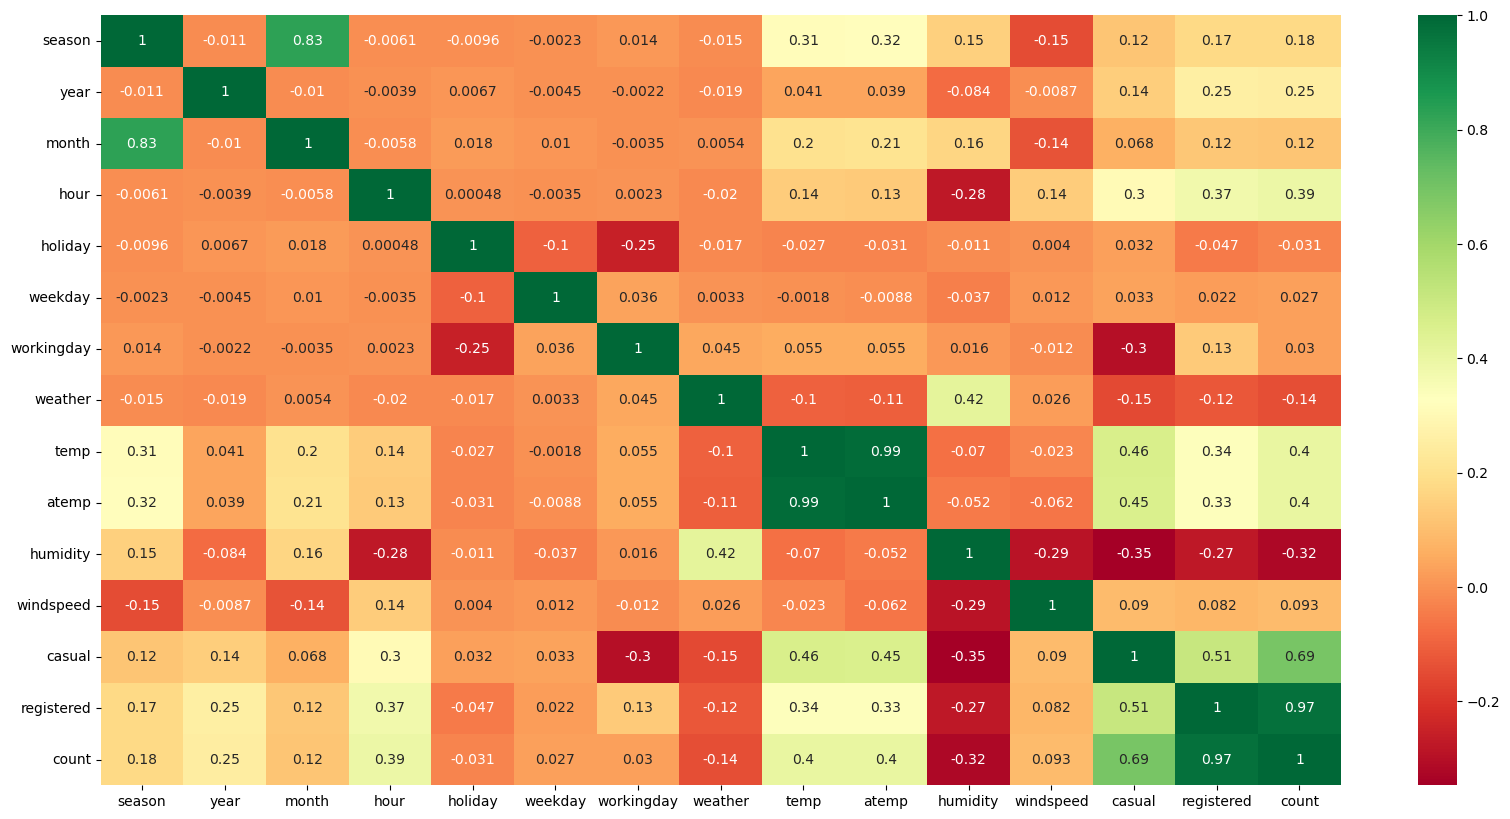

In [13]:
# search for correlations between the variables in a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(hour_df.corr(), annot=True, cmap='RdYlGn')

In [15]:
# drop the casual and registered columns because they are not needed for the analysis and prediction of the total number of bike rentals
hour_df.drop(['casual', 'registered'], axis=1, inplace=True)

# drop the temp and keep only atemp columns because they are highly correlated with each other
hour_df.drop('temp', axis=1, inplace=True)

# drop season column because it is highly correlated with the month column
hour_df.drop('season', axis=1, inplace=True)

KeyError: "['casual', 'registered'] not found in axis"

<Axes: >

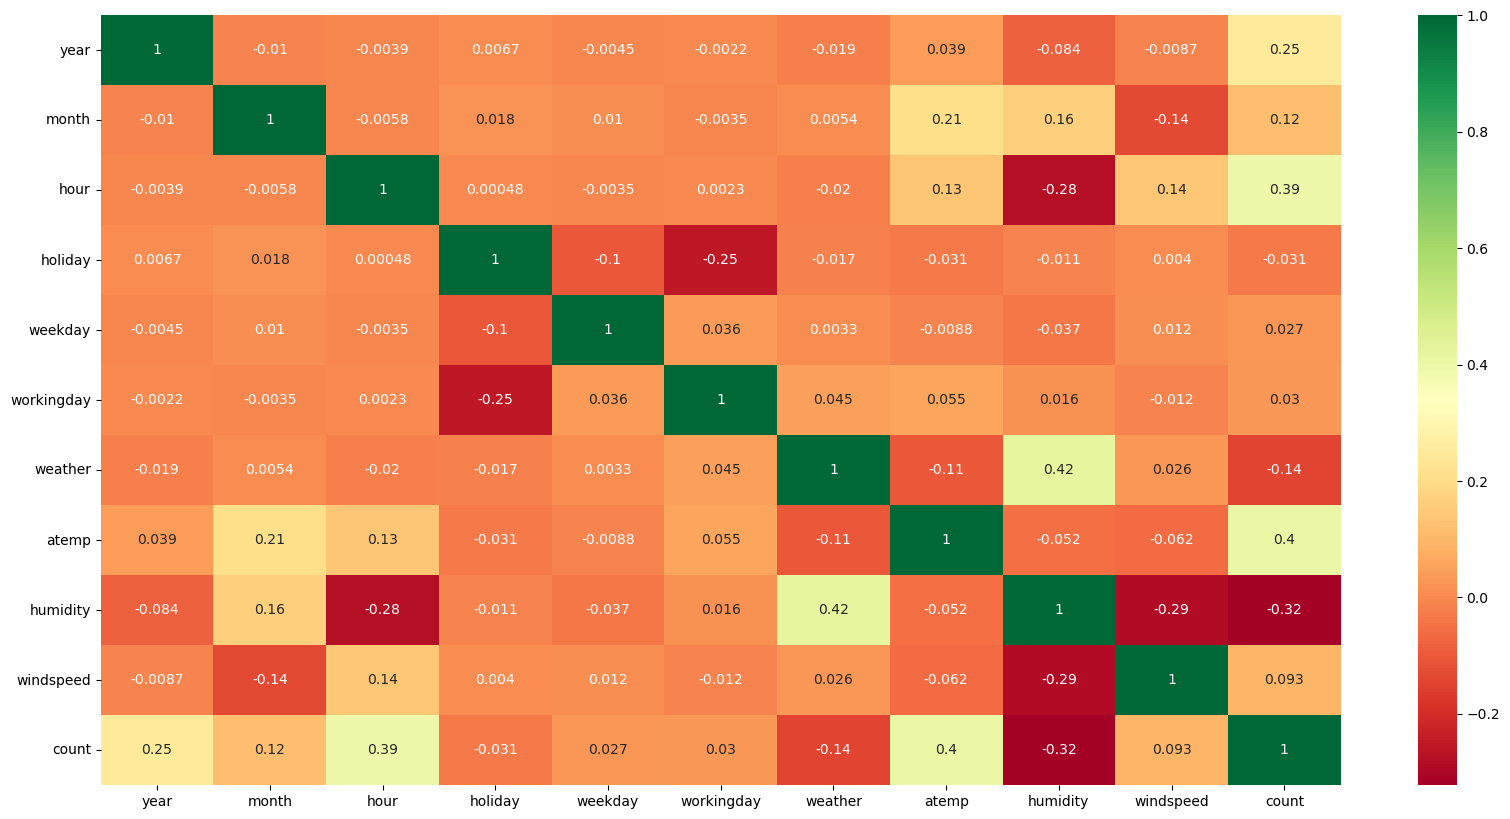

In [16]:
# show the heatmap again
plt.figure(figsize=(20, 10))
sns.heatmap(hour_df.corr(), annot=True, cmap='RdYlGn')

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

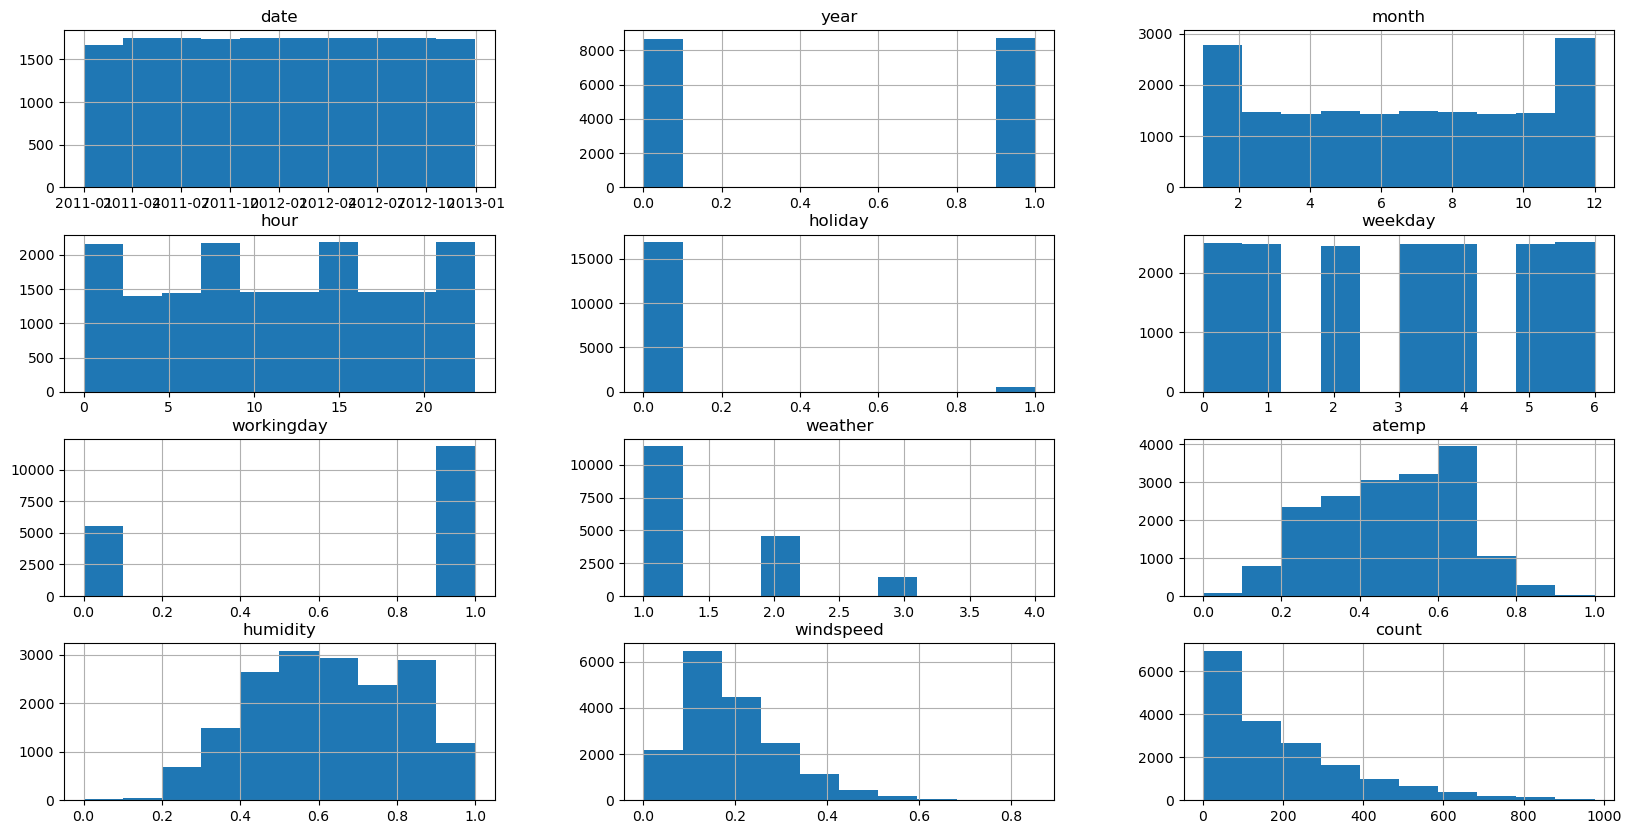

In [17]:
# look if the data has a normal distribution
hour_df.hist(figsize=(20, 10))


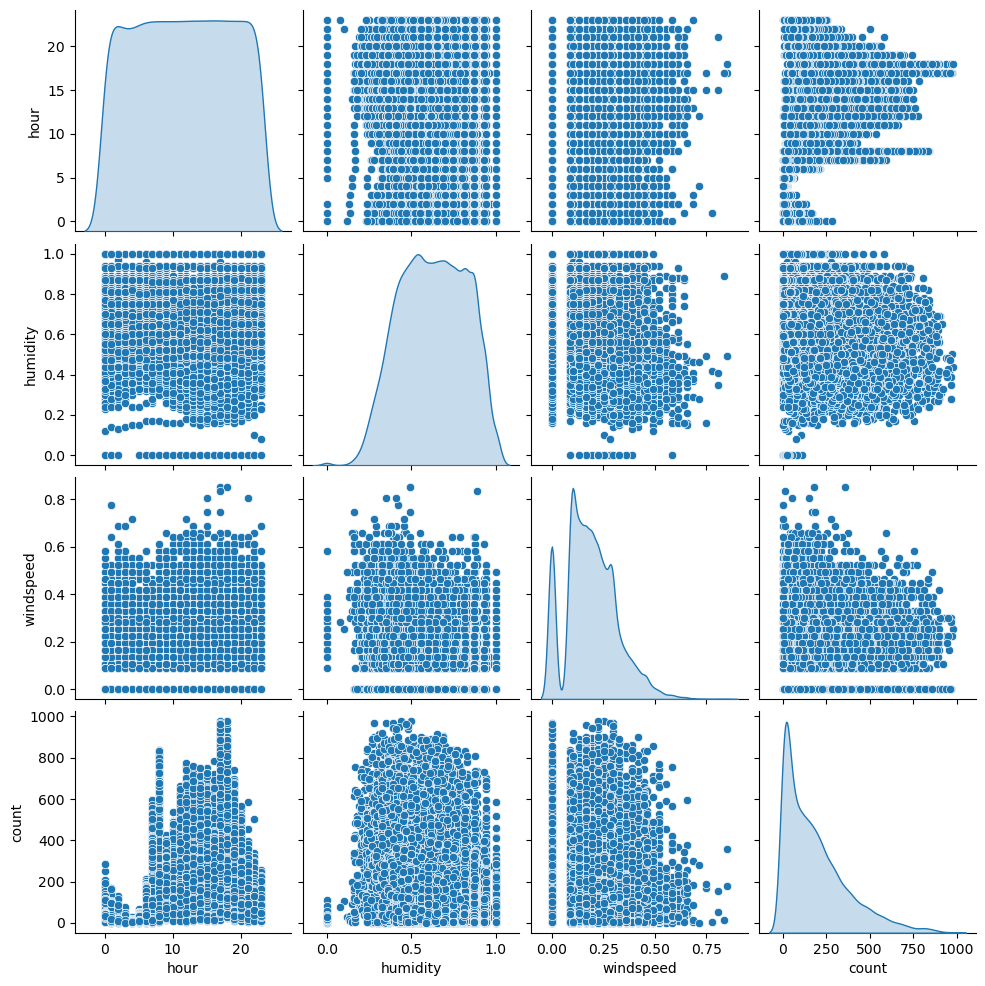

In [18]:
# search for linearity between the variables
sns.pairplot(hour_df, x_vars=['hour', 'humidity', 'windspeed', 'count'], y_vars=['hour', 'humidity', 'windspeed', 'count'], diag_kind='kde')

Text(0.5, 1.0, 'Total number of bike rentals per day')

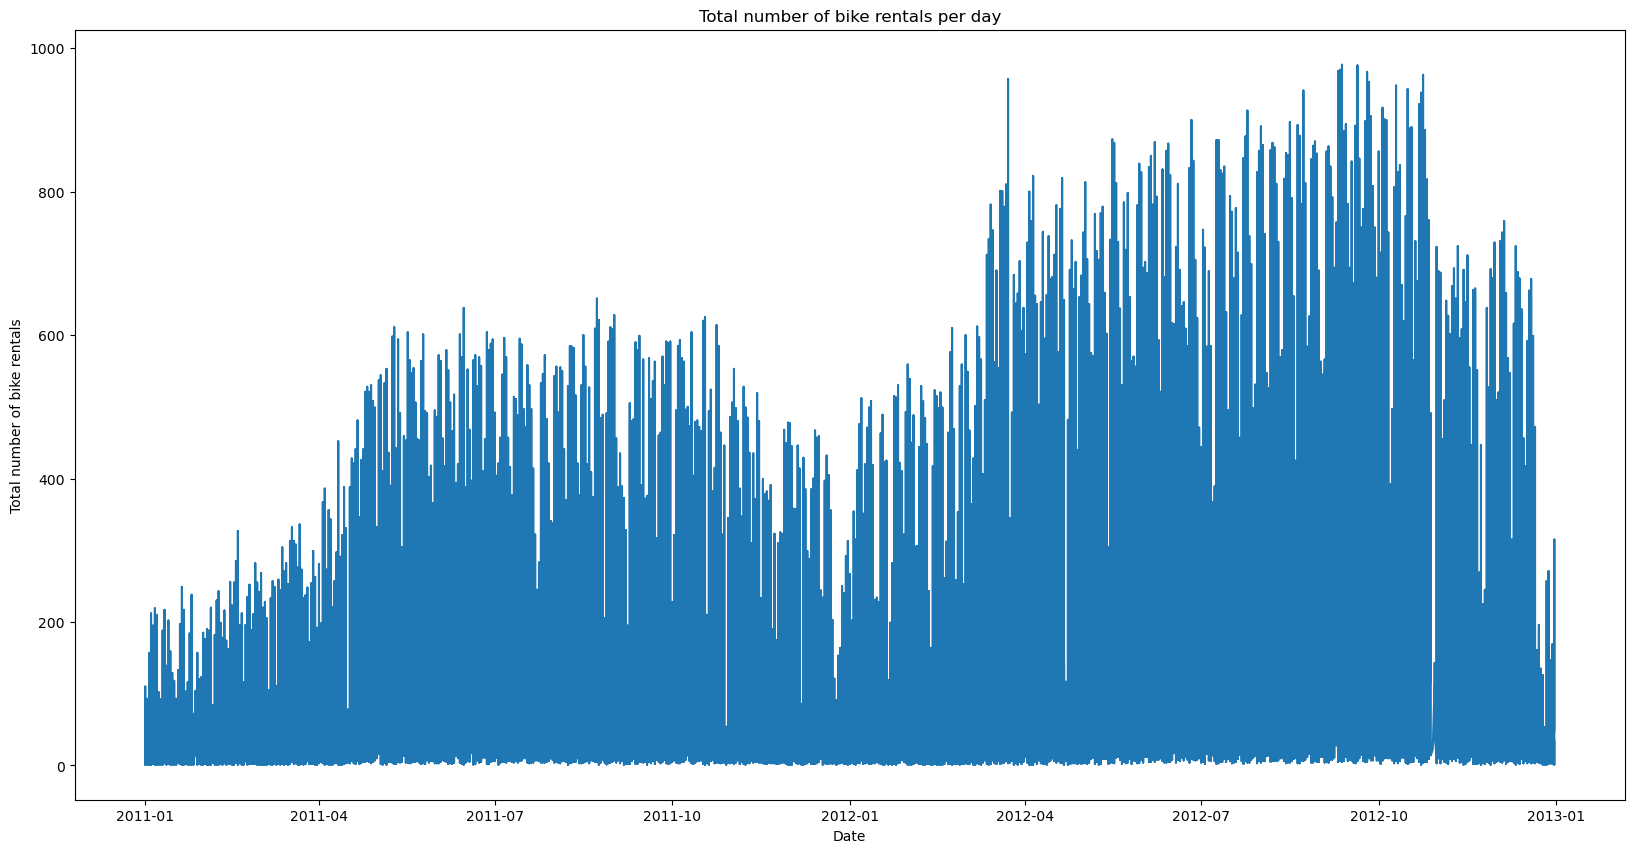

In [19]:
# timeseries plot of the total number of bike rentals
plt.figure(figsize=(20, 10))
plt.plot(hour_df['date'], hour_df['count'])
plt.xlabel('Date')
plt.ylabel('Total number of bike rentals')
plt.title('Total number of bike rentals per day')
